In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

print(pd.__version__)
print(np.__version__)

1.1.4
1.19.2


# 数据加载与探索

In [2]:
data = pd.read_csv('./data/USER_INFO_M.csv', encoding='gbk')
print(data.shape)
data.head()

(900000, 35)


,MONTH_ID,USER_ID,INNET_MONTH,IS_AGREE,AGREE_EXP_DATE,CREDIT_LEVEL,VIP_LVL,ACCT_FEE,CALL_DURA,NO_ROAM_LOCAL_CALL_DURA,...,CALLING_RING,CALLED_RING,CUST_SEX,CERT_AGE,CONSTELLATION_DESC,MANU_NAME,MODEL_NAME,OS_DESC,TERM_TYPE,IS_LOST
0,201601,U3115092040504266,62,1,201609.0,65,99.0,84.95,36891,2699,...,48,64,1.0,29.0,射手座,赫比,YD206,ANDROID 4.4.3,4,NaN
1,201601,U3115090138635105,5,1,201609.0,66,NaN,251.78,28858,889,...,39,30,1.0,23.0,白羊座,赫比,YD206,ANDROID 4.4.3,4,NaN
2,201601,U3115062769878916,171,0,NaN,67,99.0,26.00,14838,14812,...,20,66,1.0,38.0,射手座,赫比,YD206,ANDROID 4.4.3,4,NaN
3,201601,U3115061733263650,8,1,201606.0,66,99.0,139.30,11144,0,...,27,31,2.0,23.0,天蝎座,赫比,YD206,ANDROID 4.4.3,4,NaN
4,201601,U3115060569699130,8,0,NaN,67,99.0,31.95,5528,5528,...,9,13,2.0,33.0,双子座,赫比,YD206,ANDROID 4.4.3,4,NaN


In [3]:
# 重复值   ===> 去重
data.duplicated().value_counts()

False    899904
True         96
dtype: int64

In [4]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
MONTH_ID,900000.0,201602.000601,0.816549,201601.00,201601.000000,201602.000000,201603.000000,2.016030e+05
INNET_MONTH,900000.0,34.506348,34.231761,-251.00,10.000000,24.000000,49.000000,2.490000e+02
IS_AGREE,900000.0,0.510372,0.499893,0.00,0.000000,1.000000,1.000000,1.000000e+00
AGREE_EXP_DATE,459335.0,201646.870680,75.167367,201601.00,201606.000000,201610.000000,201703.000000,2.050120e+05
CREDIT_LEVEL,900000.0,66.016860,0.958600,0.00,65.000000,66.000000,67.000000,6.700000e+01
VIP_LVL,588717.0,80.084567,37.983347,2.00,99.000000,99.000000,99.000000,9.900000e+01
ACCT_FEE,900000.0,118.587759,167.786270,0.01,54.807500,86.000000,143.550000,6.500721e+04
CALL_DURA,900000.0,21880.720647,25492.145239,1.00,5729.000000,14097.000000,28703.000000,1.333863e+06
NO_ROAM_LOCAL_CALL_DURA,900000.0,12828.793494,18234.072608,0.00,1599.000000,6629.000000,16735.000000,1.333863e+06
NO_ROAM_GN_LONG_CALL_DURA,900000.0,3517.969780,6687.748777,0.00,0.000000,914.000000,4292.000000,2.934830e+05


In [5]:
data['IS_AGREE'].value_counts()

1    459335
0    440665
Name: IS_AGREE, dtype: int64

In [6]:
data.columns

Index(['MONTH_ID', 'USER_ID', 'INNET_MONTH', 'IS_AGREE', 'AGREE_EXP_DATE',
       'CREDIT_LEVEL', 'VIP_LVL', 'ACCT_FEE', 'CALL_DURA',
       'NO_ROAM_LOCAL_CALL_DURA', 'NO_ROAM_GN_LONG_CALL_DURA',
       'GN_ROAM_CALL_DURA', 'CDR_NUM', 'NO_ROAM_CDR_NUM',
       'NO_ROAM_LOCAL_CDR_NUM', 'NO_ROAM_GN_LONG_CDR_NUM', 'GN_ROAM_CDR_NUM',
       'P2P_SMS_CNT_UP', 'TOTAL_FLUX', 'LOCAL_FLUX', 'GN_ROAM_FLUX',
       'CALL_DAYS', 'CALLING_DAYS', 'CALLED_DAYS', 'CALL_RING', 'CALLING_RING',
       'CALLED_RING', 'CUST_SEX', 'CERT_AGE', 'CONSTELLATION_DESC',
       'MANU_NAME', 'MODEL_NAME', 'OS_DESC', 'TERM_TYPE', 'IS_LOST'],
      dtype='object')

In [7]:
data[['USER_ID', 'CONSTELLATION_DESC', 'MANU_NAME', 'MODEL_NAME', 'OS_DESC']].describe()

,USER_ID,CONSTELLATION_DESC,MANU_NAME,MODEL_NAME,OS_DESC
count,900000,865029,899998,900000,861806
unique,299968,12,681,6751,49
top,U3116013103546397,天秤座,苹果,A1586,IOS 8.0
freq,6,88479,437239,115125,202538


# 数据预处理

In [8]:
data = pd.read_csv('./data/USER_INFO_M.csv', encoding='gbk')

## 重复数据处理

In [9]:
data_drop = data.drop_duplicates()

In [10]:
print(data.shape)
print(data_drop.shape)

(900000, 35)
(899904, 35)


## 降维

In [11]:
data_drop[['MANU_NAME', 'MODEL_NAME', 'OS_DESC']]
for i in ['MANU_NAME', 'MODEL_NAME', 'OS_DESC']:
    del data_drop[i]
print(data_drop.shape)

(899904, 32)


## 特征整合

In [12]:
data_gb = data_drop.groupby(['USER_ID'])

In [13]:
# （0）标签
data_label = data_gb[['USER_ID', 'IS_LOST']].tail(n=1)
data_label.set_index('USER_ID', inplace=True)
data_label

,IS_LOST
USER_ID,
U3116011101365327,0.0
U3115122549657565,0.0
U3115122771884179,1.0
U3115122749792284,0.0
U3115121571754202,0.0
...,...
U3114120767704089,0.0
U3114090724981212,0.0
U3114082024818825,0.0


In [14]:
# （1） 用户基本信息
data_f1 = data_gb[['CUST_SEX', 'CERT_AGE', 'CONSTELLATION_DESC', 'TERM_TYPE']].first()

In [15]:
# (2) 在网时长
data_f2 = data_gb[['USER_ID', 'INNET_MONTH']].tail(n=1)
data_f2.set_index('USER_ID', inplace=True)

In [16]:
data_f2.head()

,INNET_MONTH
USER_ID,
U3116011101365327,3
U3115122549657565,4
U3115122771884179,3
U3115122749792284,4
U3115121571754202,4


In [17]:
# (3) 合约是否有效
def cal_is_agree(x):
    a = np.array(x)
    if sum(a) == 3:
        return 1.5
    else:
        return a[2] - np.mean(a[:2])

data_f3 = pd.DataFrame(data_gb['IS_AGREE'].apply(cal_is_agree))
data_f3.head()

,IS_AGREE
USER_ID,
U3114031824148707,0.0
U3114031824148874,1.5
U3114031824148975,1.5
U3114031824149138,0.0
U3114031824149150,0.0


In [18]:
# (4) 合约计划到期时间
tmp = data_gb[['USER_ID', 'AGREE_EXP_DATE']].tail(n=1)
tmp = tmp.set_index('USER_ID')
tmp = (pd.to_datetime(tmp['AGREE_EXP_DATE'], format='%Y%m') - pd.to_datetime('2016-3-1')).dt.days/30
data_f4 = pd.DataFrame(tmp.fillna(-1), dtype=int)

In [19]:
# （5） 信用等级
data_f5 = data_gb[['USER_ID', 'CREDIT_LEVEL']].mean()

In [20]:
# （6） VIP等级
def cal_vip_lvl(x):
    a = np.array(x)
    if a[0] == a[2] == a[1]:
        return a[2]
    else:
        return a[2] - np.mean(a[:2])
    
data_f6 = pd.DataFrame(data_gb['VIP_LVL'].apply(cal_vip_lvl).fillna(0))
data_f6.head()

,VIP_LVL
USER_ID,
U3114031824148707,99.0
U3114031824148874,99.0
U3114031824148975,99.0
U3114031824149138,99.0
U3114031824149150,99.0


In [21]:
#     （7） 本月费用：取三个月的平均值。
data_f7 = pd.DataFrame(data_gb['ACCT_FEE'].mean())

In [22]:
# （8） 平均每次通话时长
# 8.1 总通话
data_f81 = pd.DataFrame(data_gb['CALL_DURA'].sum()/data_gb['CDR_NUM'].sum(), 
                        columns=['Total_mean'])
# 8.2 本地通话
data_f82 = pd.DataFrame(data_gb['NO_ROAM_LOCAL_CALL_DURA'].sum()/data_gb['NO_ROAM_LOCAL_CDR_NUM'].sum(),
                        columns=['Local_mean'])
# 8.3 国内长途通话
data_f83 = pd.DataFrame(data_gb['NO_ROAM_GN_LONG_CALL_DURA'].sum()/data_gb['NO_ROAM_GN_LONG_CDR_NUM'].sum(), 
                        columns=['GN_Long_mean'])
# 8.4 国内漫游通话
data_f84 = pd.DataFrame(data_gb['GN_ROAM_CALL_DURA'].sum()/data_gb['GN_ROAM_CDR_NUM'].sum(), 
                        columns=['GN_Roam_mean'])

# 数据拼接
data_f8 = pd.concat([data_f81, data_f82, data_f83, data_f84], axis=1).fillna(0)

In [23]:
# (9) 其他变量
data_f9 = data_gb[['NO_ROAM_CDR_NUM', 'P2P_SMS_CNT_UP', 'TOTAL_FLUX', 'LOCAL_FLUX', 
                   'GN_ROAM_FLUX', 'CALL_DAYS', 'CALLING_DAYS', 'CALLED_DAYS', 'CALL_RING', 
                   'CALLING_RING', 'CALLED_RING',]].mean()

In [24]:
new_data = pd.concat([data_f1, data_f2, data_f3, data_f4, data_f5, 
                      data_f6, data_f7, data_f8, data_f9, data_label], 
                     axis=1)

In [25]:
data_drop.columns

Index(['MONTH_ID', 'USER_ID', 'INNET_MONTH', 'IS_AGREE', 'AGREE_EXP_DATE',
       'CREDIT_LEVEL', 'VIP_LVL', 'ACCT_FEE', 'CALL_DURA',
       'NO_ROAM_LOCAL_CALL_DURA', 'NO_ROAM_GN_LONG_CALL_DURA',
       'GN_ROAM_CALL_DURA', 'CDR_NUM', 'NO_ROAM_CDR_NUM',
       'NO_ROAM_LOCAL_CDR_NUM', 'NO_ROAM_GN_LONG_CDR_NUM', 'GN_ROAM_CDR_NUM',
       'P2P_SMS_CNT_UP', 'TOTAL_FLUX', 'LOCAL_FLUX', 'GN_ROAM_FLUX',
       'CALL_DAYS', 'CALLING_DAYS', 'CALLED_DAYS', 'CALL_RING', 'CALLING_RING',
       'CALLED_RING', 'CUST_SEX', 'CERT_AGE', 'CONSTELLATION_DESC',
       'TERM_TYPE', 'IS_LOST'],
      dtype='object')

## 缺失值处理

In [26]:
print(new_data.shape)
print(new_data.describe().shape)

(299968, 26)
(8, 25)


In [27]:
new_data.describe().T

,count,mean,std,min,25%,50%,75%,max
CUST_SEX,288539.0,1.329855,0.470161,1.00,1.000000,1.000000,2.000000,2.000000
CERT_AGE,288311.0,32.944605,10.073672,6.00,26.000000,31.000000,38.000000,93.000000
TERM_TYPE,299968.0,3.722564,0.503301,2.00,3.000000,4.000000,4.000000,4.000000
INNET_MONTH,299968.0,35.507381,34.222636,-249.00,11.000000,25.000000,50.000000,249.000000
IS_AGREE,299968.0,0.720794,0.768233,-1.00,0.000000,0.500000,1.500000,1.500000
AGREE_EXP_DATE,299968.0,4.203495,8.552898,-1.00,-1.000000,0.000000,8.000000,423.000000
CREDIT_LEVEL,299968.0,66.016826,0.957528,0.00,65.000000,66.000000,67.000000,67.000000
VIP_LVL,299968.0,46.679804,48.924503,0.00,0.000000,4.000000,99.000000,99.000000
ACCT_FEE,299968.0,118.595064,148.610159,0.15,56.000000,89.300000,144.000000,42951.556667
Total_mean,299968.0,130.390656,85.117982,1.00,78.728634,109.763283,156.491832,2733.461783


In [28]:
new_data['CONSTELLATION_DESC'].value_counts().sum()

288311

In [29]:
# 'CUST_SEX', 'CERT_AGE', 'CONSTELLATION_DESC'存在缺失值
# new_data.columns
new_data['CUST_SEX'] = new_data['CUST_SEX'].fillna(3)
new_data['CERT_AGE'] = new_data['CERT_AGE'].fillna(0)
new_data['CONSTELLATION_DESC'] = new_data['CONSTELLATION_DESC'].fillna(0)

In [30]:
print(new_data['CONSTELLATION_DESC'].value_counts().sum())
new_data.describe().T

299968


,count,mean,std,min,25%,50%,75%,max
CUST_SEX,299968.0,1.393489,0.561122,1.00,1.000000,1.000000,2.000000,3.000000
CERT_AGE,299968.0,31.664351,11.750483,0.00,25.000000,30.000000,38.000000,93.000000
TERM_TYPE,299968.0,3.722564,0.503301,2.00,3.000000,4.000000,4.000000,4.000000
INNET_MONTH,299968.0,35.507381,34.222636,-249.00,11.000000,25.000000,50.000000,249.000000
IS_AGREE,299968.0,0.720794,0.768233,-1.00,0.000000,0.500000,1.500000,1.500000
AGREE_EXP_DATE,299968.0,4.203495,8.552898,-1.00,-1.000000,0.000000,8.000000,423.000000
CREDIT_LEVEL,299968.0,66.016826,0.957528,0.00,65.000000,66.000000,67.000000,67.000000
VIP_LVL,299968.0,46.679804,48.924503,0.00,0.000000,4.000000,99.000000,99.000000
ACCT_FEE,299968.0,118.595064,148.610159,0.15,56.000000,89.300000,144.000000,42951.556667
Total_mean,299968.0,130.390656,85.117982,1.00,78.728634,109.763283,156.491832,2733.461783


## 异常值处理

In [31]:
new_data.loc[new_data['INNET_MONTH'] < 0, 'INNET_MONTH'] = 0

In [32]:
new_data.describe().T

,count,mean,std,min,25%,50%,75%,max
CUST_SEX,299968.0,1.393489,0.561122,1.00,1.000000,1.000000,2.000000,3.000000
CERT_AGE,299968.0,31.664351,11.750483,0.00,25.000000,30.000000,38.000000,93.000000
TERM_TYPE,299968.0,3.722564,0.503301,2.00,3.000000,4.000000,4.000000,4.000000
INNET_MONTH,299968.0,35.508211,34.218755,0.00,11.000000,25.000000,50.000000,249.000000
IS_AGREE,299968.0,0.720794,0.768233,-1.00,0.000000,0.500000,1.500000,1.500000
AGREE_EXP_DATE,299968.0,4.203495,8.552898,-1.00,-1.000000,0.000000,8.000000,423.000000
CREDIT_LEVEL,299968.0,66.016826,0.957528,0.00,65.000000,66.000000,67.000000,67.000000
VIP_LVL,299968.0,46.679804,48.924503,0.00,0.000000,4.000000,99.000000,99.000000
ACCT_FEE,299968.0,118.595064,148.610159,0.15,56.000000,89.300000,144.000000,42951.556667
Total_mean,299968.0,130.390656,85.117982,1.00,78.728634,109.763283,156.491832,2733.461783


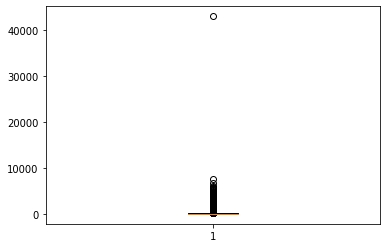

In [33]:
plt.boxplot(new_data['ACCT_FEE'])
plt.show()

In [34]:
# a = new_data['ACCT_FEE'].mean()
new_data.loc[new_data['ACCT_FEE'] > 10000, 'ACCT_FEE'] = np.mean(new_data['ACCT_FEE'])

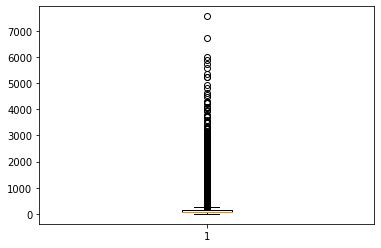

In [35]:
plt.boxplot(new_data['ACCT_FEE'])
plt.show()

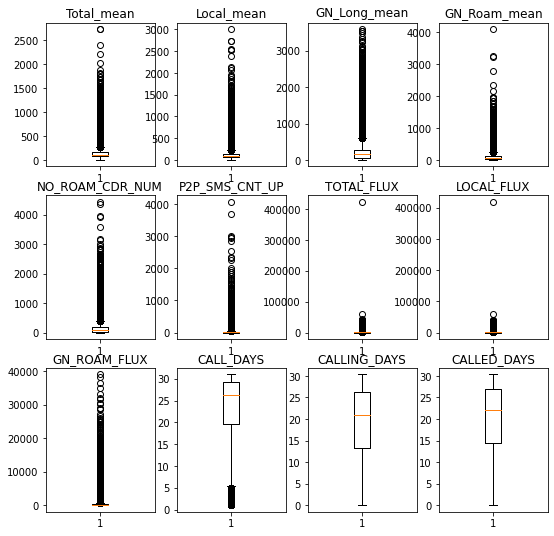

In [36]:
plt.figure(figsize=(9, 9))
for i, j in enumerate(['Total_mean', 'Local_mean', 'GN_Long_mean', 'GN_Roam_mean',
       'NO_ROAM_CDR_NUM', 'P2P_SMS_CNT_UP', 'TOTAL_FLUX', 'LOCAL_FLUX',
       'GN_ROAM_FLUX', 'CALL_DAYS', 'CALLING_DAYS', 'CALLED_DAYS']):
    plt.subplot(3, 4, i+1)
    plt.title(j)
    plt.boxplot(new_data[j])
plt.show()

In [37]:
new_data.loc[new_data['TOTAL_FLUX'] > 50000, 'TOTAL_FLUX'] = np.mean(new_data['TOTAL_FLUX'])
new_data.loc[new_data['LOCAL_FLUX'] > 50000, 'LOCAL_FLUX'] = np.mean(new_data['LOCAL_FLUX'])

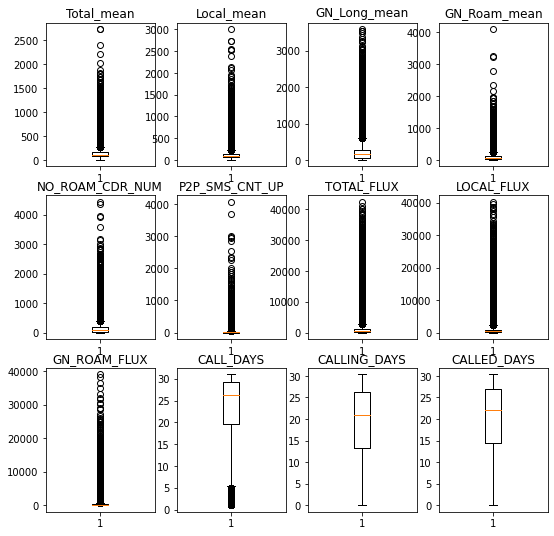

In [38]:
plt.figure(figsize=(9, 9))
for i, j in enumerate(['Total_mean', 'Local_mean', 'GN_Long_mean', 'GN_Roam_mean',
       'NO_ROAM_CDR_NUM', 'P2P_SMS_CNT_UP', 'TOTAL_FLUX', 'LOCAL_FLUX',
       'GN_ROAM_FLUX', 'CALL_DAYS', 'CALLING_DAYS', 'CALLED_DAYS']):
    plt.subplot(3, 4, i+1)
    plt.title(j)
    plt.boxplot(new_data[j])
plt.show()

In [39]:
new_data.to_csv('./new_data.csv')  # 保存文件

# 特征分析

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('./new_data.csv', index_col=0)
print(data.shape)

(299968, 26)


In [4]:
data.columns

Index(['CUST_SEX', 'CERT_AGE', 'CONSTELLATION_DESC', 'TERM_TYPE',
       'INNET_MONTH', 'IS_AGREE', 'AGREE_EXP_DATE', 'CREDIT_LEVEL', 'VIP_LVL',
       'ACCT_FEE', 'Total_mean', 'Local_mean', 'GN_Long_mean', 'GN_Roam_mean',
       'NO_ROAM_CDR_NUM', 'P2P_SMS_CNT_UP', 'TOTAL_FLUX', 'LOCAL_FLUX',
       'GN_ROAM_FLUX', 'CALL_DAYS', 'CALLING_DAYS', 'CALLED_DAYS', 'CALL_RING',
       'CALLING_RING', 'CALLED_RING', 'IS_LOST'],
      dtype='object')

## 性别特征

In [5]:
data['CUST_SEX'].value_counts()/data['CUST_SEX'].value_counts().sum()

1.0    0.644612
2.0    0.317287
3.0    0.038101
Name: CUST_SEX, dtype: float64

In [6]:
pd.crosstab(data['CUST_SEX'], data['IS_LOST'])

IS_LOST,0.0,1.0
CUST_SEX,,
1.0,186781,6582
2.0,92311,2865
3.0,11197,232


In [7]:
def get_y_set(y):
    anchor_y = []
    y = y.value_counts()/y.value_counts().sum()
    anchor_y.append(y[1])
    anchor_y.append(y[2])
    anchor_y.append(y[1]/y[2])
    return anchor_y

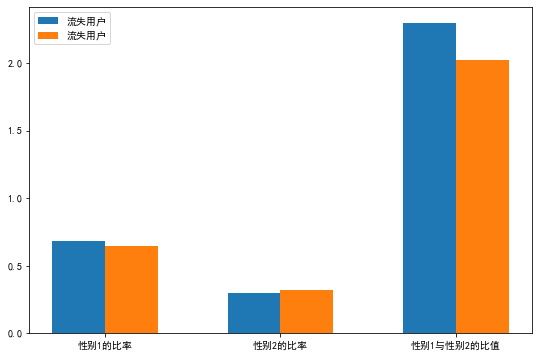

In [8]:
y1 = get_y_set(data.loc[data['IS_LOST'] == 1, 'CUST_SEX'])
y2 = get_y_set(data.loc[data['IS_LOST'] == 0, 'CUST_SEX'])
x = np.arange(len(y1)) + 1
w = 0.3

plt.rcParams['font.sans-serif'] = 'SimHei'
fig, ax = plt.subplots(figsize=(9, 6))
ax.bar(x, y1, w, label='流失用户')
ax.bar(x+w, y2, w, label='流失用户')
ax.set_xticks(x+w/2)
ax.set_xticklabels(['性别1的比率', '性别2的比率', '性别1与性别2的比值'])
plt.legend(loc='upper left')
plt.show()

## 年龄特征：不采用

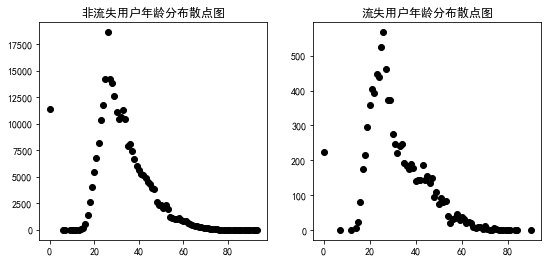

In [9]:
plt.figure(figsize=(9, 4))
plt.subplot(1, 2, 1)
plt.plot(data.loc[data['IS_LOST'] == 0, 'CERT_AGE'].value_counts(), 'ok', linewidth=1)
plt.title('非流失用户年龄分布散点图')
plt.subplot(1, 2, 2)
plt.plot(data.loc[data['IS_LOST'] == 1, 'CERT_AGE'].value_counts(), 'ok', linewidth=1)
plt.title('流失用户年龄分布散点图')
plt.show()

## 星座特征: 不采用

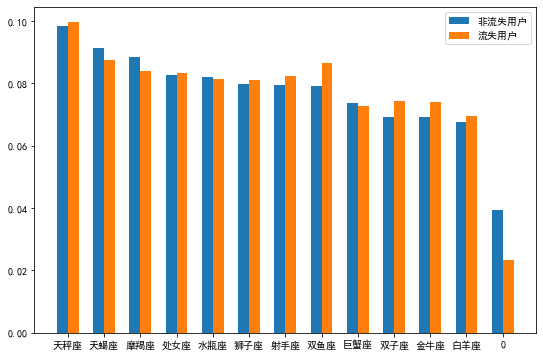

In [10]:
y1 = data.loc[data['IS_LOST'] == 0, 'CONSTELLATION_DESC'].value_counts()\
/data.loc[data['IS_LOST'] == 0, 'CONSTELLATION_DESC'].value_counts().sum()
y2 = data.loc[data['IS_LOST'] == 1, 'CONSTELLATION_DESC'].value_counts()\
/data.loc[data['IS_LOST'] == 1, 'CONSTELLATION_DESC'].value_counts().sum()
x = np.arange(len(y1))+1
w = 0.3

labs = list(y1.index)

fig, ax = plt.subplots(figsize=(9, 6))
ax.bar(x, y1[labs], w, label='非流失用户')
ax.bar(x+w, y2[labs], w, label='流失用户')
ax.set_xticks(x+w/2)
ax.set_xticklabels(labs)
plt.legend()
plt.show()

## 在网时长

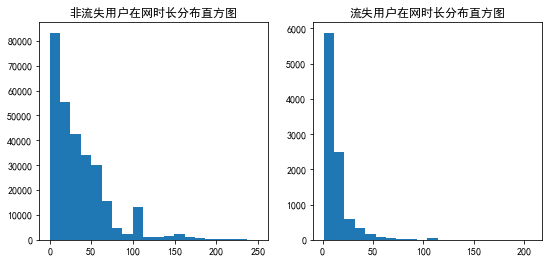

In [11]:
y1 = data.loc[data['IS_LOST'] == 0, 'INNET_MONTH']
y2 = data.loc[data['IS_LOST'] == 1, 'INNET_MONTH']

plt.figure(figsize=(9, 4))
plt.subplot(1, 2, 1)
plt.hist(y1, bins=20)
plt.title('非流失用户在网时长分布直方图')
# plt.ylim(0, 90000)
plt.subplot(1, 2, 2)
h = plt.hist(y2, bins=20)
plt.title('流失用户在网时长分布直方图')
# plt.ylim(0, 90000)
plt.show()

## 合约用户与合约计划到期时间

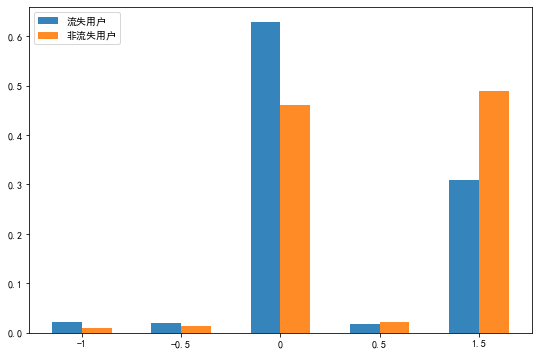

In [12]:
agree1 = data[data['IS_LOST'] == 1]['IS_AGREE'].value_counts()
agree2 = data[data['IS_LOST'] == 0]['IS_AGREE'].value_counts()
agree_y1 = [agree1[-1]/agree1.sum(),agree1[-0.5]/agree1.sum(),agree1[0]/agree1.sum(),agree1[0.5]/agree1.sum(),agree1[1.5]/agree1.sum()]
agree_y2 = [agree2[-1]/agree2.sum(),agree2[-0.5]/agree2.sum(),agree2[0]/agree2.sum(),agree2[0.5]/agree2.sum(),agree2[1.5]/agree2.sum()]
agree_x = np.arange(len(agree_y1)) +1
plt.rcParams['font.family'] = 'SimHei'
fig,ax=plt.subplots(figsize = (9,6))
width=0.3
ax.bar(agree_x,agree_y1,width,alpha=0.9,label='流失用户')
ax.bar(agree_x+width,agree_y2,width,alpha=0.9,label = '非流失用户')
ax.set_xticks(agree_x+width/2)
ax.set_xticklabels([-1,-0.5,0,0.5,1.5])
plt.legend(loc="upper left")
plt.show()

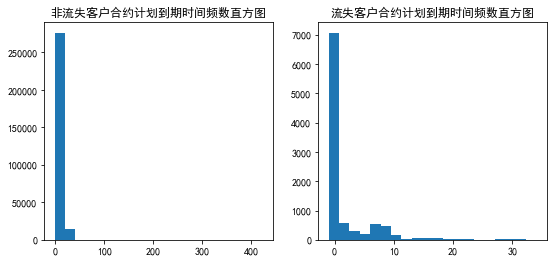

In [13]:
tt = ['非流失客户合约计划到期时间频数直方图','流失客户合约计划到期时间频数直方图']
plt.figure(figsize=(9, 4))
for i in range(2):
    plt.subplot(1, 2, i+1)
    plt.title(tt[i])
    plt.hist(data[data['IS_LOST'] == i]['AGREE_EXP_DATE'], bins=20)

plt.show()

## 信用等级

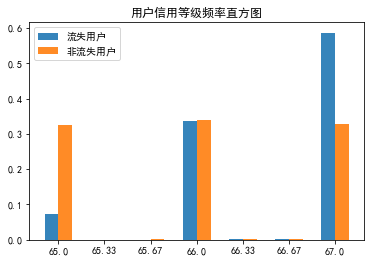

In [14]:
labs = ['非流失用户信用等级频率直方图', '流失用户信用等级频率直方图']

credit_y1 = data[data['IS_LOST'] == 1]['CREDIT_LEVEL'].value_counts()/data[data['IS_LOST'] == 1]['CREDIT_LEVEL'].value_counts().sum()
credit_y2 = data[data['IS_LOST'] == 0]['CREDIT_LEVEL'].value_counts()/data[data['IS_LOST'] == 0]['CREDIT_LEVEL'].value_counts().sum()
credit_x = np.arange(len(credit_y1)) +1
y_labs = credit_y1.sort_index().index
width = 0.3

fig,ax = plt.subplots(figsize=(6, 4))
ax.bar(credit_x, credit_y1[y_labs], width, alpha=0.9, label='流失用户')
ax.bar(credit_x+width, credit_y2[y_labs], width, alpha=0.9, label='非流失用户')
ax.set_xticks(credit_x+width/2)
ax.set_xticklabels(np.round(y_labs, 2))
plt.legend(loc="upper left")
plt.title('用户信用等级频率直方图')
plt.show()


## VIP等级

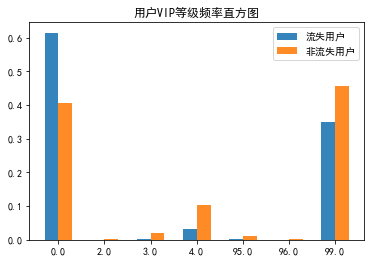

In [15]:
labs = ['非流失用户VIP等级频率直方图', '流失用户VIP等级频率直方图']

vip_y1 = data[data['IS_LOST'] == 1]['VIP_LVL'].value_counts()/data[data['IS_LOST'] == 1]['VIP_LVL'].value_counts().sum()
vip_y2 = data[data['IS_LOST'] == 0]['VIP_LVL'].value_counts()/data[data['IS_LOST'] == 0]['VIP_LVL'].value_counts().sum()
vip_x = np.arange(len(credit_y1)) +1
y_labs = (vip_y1.sort_index().index)
width = 0.3

fig, ax = plt.subplots(figsize=(6, 4))
ax.bar(vip_x, vip_y1[y_labs], width, alpha=0.9, label='流失用户')
ax.bar(vip_x+width, vip_y2[y_labs], width, alpha=0.9, label='非流失用户')
ax.set_xticks(vip_x+width/2)
ax.set_xticklabels(y_labs)
plt.legend()
plt.title('用户VIP等级频率直方图')
plt.show()

## 剔除部分特征

In [5]:
del data['CERT_AGE']
del data['CONSTELLATION_DESC']

In [6]:
data.shape

(299968, 24)

## 针对不同费用情况将用户划分成不同类型——聚类

In [7]:
# 聚类：Kmeans算法
# K取值
from myfun import get_mic_bt
anchor_MIC, anchor_BT = get_mic_bt(data, 'ACCT_FEE')

1      69210.52121349449
2      36414.14751816701
3      22888.947909451817
4      15963.1270828786
5      11866.746392721505
6      9336.279962785979
7      7437.772984231222
8      6181.669390865698
9      5146.779674312541
10      4405.03836150729
MIC:     [69210.52121349449, 36414.14751816701, 22888.947909451817, 15963.1270828786, 11866.746392721505, 9336.279962785979, 7437.772984231222, 6181.669390865698, 5146.779674312541, 4405.03836150729]
BT:     [3.750052786096229e-26, 0.44636295139906645, 0.6718835184086653, 0.78720986667898, 0.8530098993976454, 0.8908173265937609, 0.9191576497536151, 0.9361802328940172, 0.9502306224017945, 0.9594907644257223]


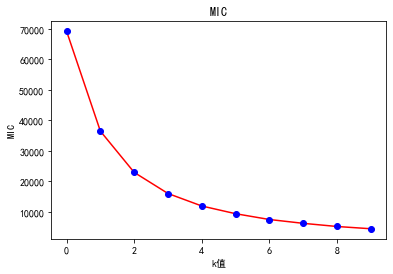

In [8]:
plt.rcParams['font.sans-serif'] = 'SimHei'
plt.plot(anchor_MIC, color='r')
plt.plot(anchor_MIC, 'o', color='b')
plt.xlabel('k值')
plt.ylabel('MIC')
plt.title('MIC')
plt.show()

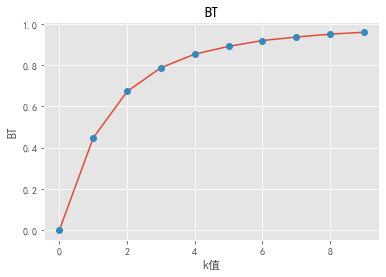

In [9]:
plt.rcParams['font.sans-serif'] = 'SimHei'
plt.style.use('ggplot')
plt.plot(anchor_BT)
plt.plot(anchor_BT, 'o')
plt.xlabel('k值')
plt.ylabel('BT')
plt.title('BT')
plt.show()

In [10]:
k = 5
from sklearn.cluster import KMeans
model = KMeans(n_clusters=k)
model.fit(np.array(data['ACCT_FEE'])[:, np.newaxis])
model.labels_

array([4, 2, 0, ..., 4, 4, 4])

In [11]:
data['cluster'] = model.labels_
data

,CUST_SEX,TERM_TYPE,INNET_MONTH,IS_AGREE,AGREE_EXP_DATE,CREDIT_LEVEL,VIP_LVL,ACCT_FEE,Total_mean,Local_mean,...,LOCAL_FLUX,GN_ROAM_FLUX,CALL_DAYS,CALLING_DAYS,CALLED_DAYS,CALL_RING,CALLING_RING,CALLED_RING,IS_LOST,cluster
U3114031824148707,1.0,3,25,0.0,-1,67.0,99.0,79.050000,46.749627,0.000000,...,0.000000,436.547473,27.333333,23.000000,25.000000,37.333333,27.666667,25.666667,0.0,4
U3114031824148874,2.0,4,25,1.5,0,65.0,99.0,258.456667,72.539206,70.639311,...,3865.186314,39.766818,30.000000,25.333333,30.000000,94.333333,42.666667,74.000000,0.0,2
U3114031824148975,2.0,4,25,1.5,0,65.0,99.0,166.033333,108.124549,88.598540,...,2150.793577,545.570873,29.666667,29.333333,24.666667,37.666667,30.666667,26.000000,0.0,0
U3114031824149138,2.0,3,25,0.0,-1,65.0,99.0,141.950000,186.905632,147.475248,...,345.069051,298.620997,29.666667,28.333333,27.333333,35.333333,26.333333,21.333333,0.0,0
U3114031824149150,1.0,4,25,0.0,-1,65.0,99.0,80.666667,49.409639,51.888889,...,161.041526,0.000000,6.666667,5.666667,6.666667,8.666667,1.666667,7.666667,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
U3116031072688741,2.0,2,1,0.0,-1,67.0,0.0,18.000000,26.400000,26.400000,...,0.981231,0.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,0.0,4
U3116031472722618,1.0,2,1,0.0,-1,67.0,0.0,14.950000,147.142857,136.812500,...,2.762216,0.000000,9.000000,8.000000,4.000000,9.000000,8.000000,4.000000,0.0,4
U3116031607178768,1.0,3,1,0.0,-1,66.0,0.0,38.000000,53.105263,53.072727,...,0.002353,0.000000,16.000000,1.000000,16.000000,43.000000,1.000000,43.000000,0.0,4
U3116032708218652,1.0,2,1,0.0,-1,66.0,0.0,0.150000,15.333333,15.333333,...,0.000000,0.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.000000,0.0,4


In [12]:
labs = ['低费用', '中低费用', '一般费用', '中高费用', '高费用']
tmp = ((i, j[0]) for i, j in enumerate(model.cluster_centers_))

id2lab = {j[0]:labs[i]for i, j in enumerate(sorted(tmp, key=lambda x: x[1]))}

In [13]:
data['cluster'] = data['cluster'].map(id2lab)

In [14]:
data['cluster'].value_counts()

低费用     174516
中低费用     99226
一般费用     23561
中高费用      2517
高费用        148
Name: cluster, dtype: int64

In [15]:
pd.crosstab(data['cluster'], data['IS_LOST'])

IS_LOST,0.0,1.0
cluster,,
一般费用,23363,198
中低费用,97565,1661
中高费用,2506,11
低费用,166708,7808
高费用,147,1


## 特征选择

In [16]:
data.shape

(299968, 25)

In [17]:
from sklearn.ensemble import ExtraTreesClassifier  # 导入信息熵的树
from sklearn.feature_selection import SelectFromModel  # 导入特征筛选模块

# labs = ['低费用', '中低费用', '一般费用', '中高费用', '高费用']
labs = data['cluster'].unique()
cols = data.columns

res = {}
for i in range(len(labs)):
    tmp = data.loc[data['cluster'] == labs[i], :]
    y = tmp['IS_LOST']
    del tmp['IS_LOST']
    del tmp['cluster']
    x = tmp.copy()
#     print(x.shape, y.shape)
    etc = ExtraTreesClassifier().fit(x, y)
    importances = etc.feature_importances_  # 获取模型重要程度
    importances.sort()
    sfm = SelectFromModel(etc, threshold=importances[13], prefit=True)
    feature_ind = sfm.get_support(indices=True)
    anchor = [cols[j] for j in feature_ind]
    res[labs[i]] = anchor
res

{'低费用': ['INNET_MONTH',
  'ACCT_FEE',
  'Local_mean',
  'GN_Roam_mean',
  'NO_ROAM_CDR_NUM',
  'TOTAL_FLUX',
  'CALL_DAYS',
  'CALLING_DAYS',
  'CALLED_DAYS',
  'CALLING_RING'],
 '一般费用': ['INNET_MONTH',
  'ACCT_FEE',
  'GN_Roam_mean',
  'NO_ROAM_CDR_NUM',
  'P2P_SMS_CNT_UP',
  'CALL_DAYS',
  'CALLING_DAYS',
  'CALLED_DAYS',
  'CALLING_RING',
  'CALLED_RING'],
 '中低费用': ['INNET_MONTH',
  'ACCT_FEE',
  'NO_ROAM_CDR_NUM',
  'P2P_SMS_CNT_UP',
  'TOTAL_FLUX',
  'CALL_DAYS',
  'CALLING_DAYS',
  'CALLED_DAYS',
  'CALLING_RING',
  'CALLED_RING'],
 '中高费用': ['Local_mean',
  'GN_Long_mean',
  'NO_ROAM_CDR_NUM',
  'TOTAL_FLUX',
  'LOCAL_FLUX',
  'GN_ROAM_FLUX',
  'CALL_DAYS',
  'CALLING_DAYS',
  'CALLED_DAYS',
  'CALL_RING'],
 '高费用': ['TERM_TYPE',
  'INNET_MONTH',
  'IS_AGREE',
  'ACCT_FEE',
  'Local_mean',
  'NO_ROAM_CDR_NUM',
  'TOTAL_FLUX',
  'LOCAL_FLUX',
  'CALL_RING',
  'CALLED_RING']}

# 模型构建

In [23]:
# 
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

model = [
    DecisionTreeClassifier(),
    MLPClassifier(hidden_layer_sizes=(17, 10), max_iter=900),
    LinearSVC(),
    GaussianNB(),
]
model_labs = ['决策树', '神经网络', '支持向量机', '高斯朴素贝叶斯']

labs = data['cluster'].unique()
for i in range(5):
    tmp = data.loc[data['cluster'] == labs[i], :]
    x = tmp.drop(['IS_LOST', 'cluster'], axis=1)
    x = x[res[labs[i]]]
    y = tmp['IS_LOST']
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
    ss = StandardScaler().fit(x_train)
    x_train_ss = ss.transform(x_train)

    for j in range(4):
        model0 = model[j]
        model0.fit(x_train_ss, y_train)
        x_test_ss = ss.transform(x_test)
        y_pre = model0.predict(x_test_ss)
        print(labs[i], model_labs[j], model0.score(x_test, y_test))
# print(x.shape, y.shape)

低费用 决策树 0.9554492321796929
低费用 神经网络 0.9553919321567729


C:\Users\yang\Anaconda3\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


低费用 支持向量机 0.9494327297730919
低费用 高斯朴素贝叶斯 0.8643135457254183
一般费用 决策树 0.9929980903882877
一般费用 神经网络 0.9830256736685763


C:\Users\yang\Anaconda3\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


一般费用 支持向量机 0.9448334394228729
一般费用 高斯朴素贝叶斯 0.6768512624655209
中低费用 决策树 0.9361080318452081
中低费用 神经网络 0.9045651516678423


C:\Users\yang\Anaconda3\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


中低费用 支持向量机 0.9836742920487755
中低费用 高斯朴素贝叶斯 0.9833719641237529
中高费用 决策树 0.998015873015873
中高费用 神经网络 0.998015873015873
中高费用 支持向量机 0.007936507936507936
中高费用 高斯朴素贝叶斯 0.1111111111111111
高费用 决策树 1.0
高费用 神经网络 1.0
高费用 支持向量机 0.0
高费用 高斯朴素贝叶斯 1.0


C:\Users\yang\Anaconda3\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


# 展示

In [25]:
def cm_plot(y, yp):
    cm = confusion_matrix(y, yp) #混淆矩阵
    plt.matshow(cm, cmap=plt.cm.Greens) #画混淆矩阵图，配色风格使用cm.Greens，更多风格请参考官网。
    plt.colorbar() #颜色标签
    for x in range(len(cm)): #数据标签
        for y in range(len(cm)):
            plt.annotate(cm[x,y], xy=(y, x), horizontalalignment='center', verticalalignment='center')
    plt.ylabel('True label') #坐标轴标签
    plt.xlabel('Predicted label') #坐标轴标签
    return plt

>>>>>>>>>>>>>>>>>>>>>>>>>>>> 决策树 <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
                        
低费用


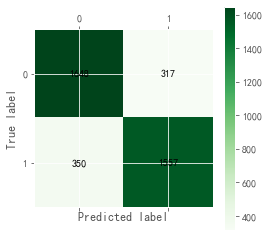

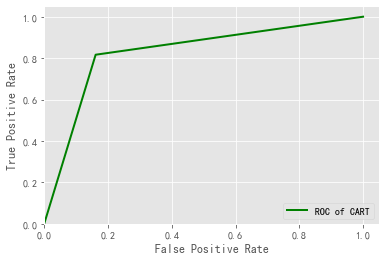

              precision    recall  f1-score   support

         0.0       0.82      0.84      0.83      1965
         1.0       0.83      0.82      0.82      1907

    accuracy                           0.83      3872
   macro avg       0.83      0.83      0.83      3872
weighted avg       0.83      0.83      0.83      3872

准确率 0.8277376033057852
召回率 0.816465652857892
AUC值 0.8275712488208035

中低费用


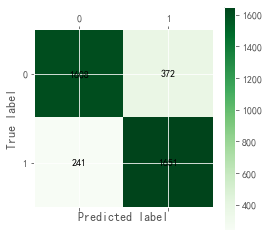

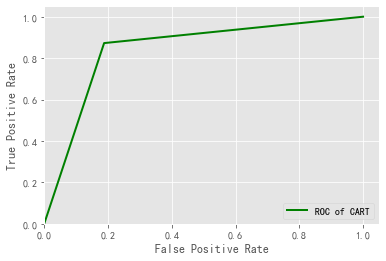

              precision    recall  f1-score   support

         0.0       0.87      0.81      0.84      1980
         1.0       0.82      0.87      0.84      1892

    accuracy                           0.84      3872
   macro avg       0.84      0.84      0.84      3872
weighted avg       0.84      0.84      0.84      3872

准确率 0.8416838842975206
召回率 0.8726215644820295
AUC值 0.8423713883016208

一般费用


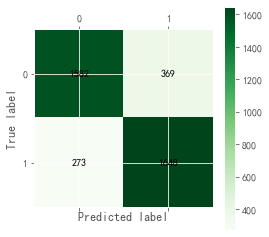

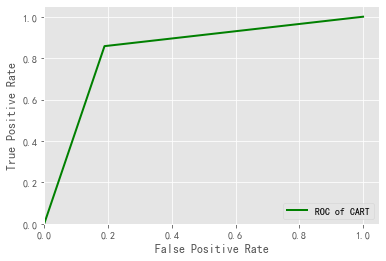

              precision    recall  f1-score   support

         0.0       0.85      0.81      0.83      1951
         1.0       0.82      0.86      0.84      1921

    accuracy                           0.83      3872
   macro avg       0.83      0.83      0.83      3872
weighted avg       0.84      0.83      0.83      3872

准确率 0.8341942148760331
召回率 0.8578865174388339
AUC值 0.8343763699444298

中高费用


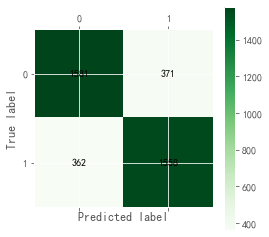

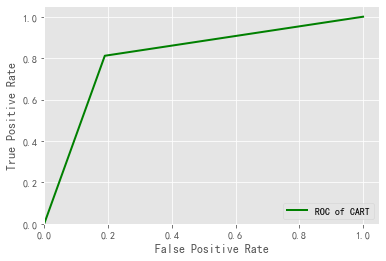

              precision    recall  f1-score   support

         0.0       0.81      0.81      0.81      1952
         1.0       0.81      0.81      0.81      1920

    accuracy                           0.81      3872
   macro avg       0.81      0.81      0.81      3872
weighted avg       0.81      0.81      0.81      3872

准确率 0.8106921487603306
召回率 0.8114583333333333
AUC值 0.8106984289617486

高费用


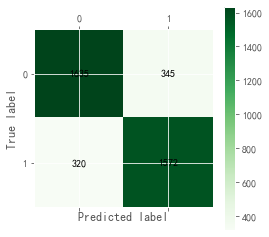

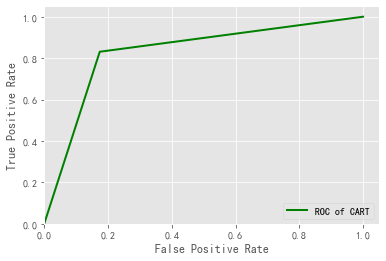

              precision    recall  f1-score   support

         0.0       0.84      0.83      0.83      1980
         1.0       0.82      0.83      0.83      1892

    accuracy                           0.83      3872
   macro avg       0.83      0.83      0.83      3872
weighted avg       0.83      0.83      0.83      3872

准确率 0.828254132231405
召回率 0.8308668076109936
AUC值 0.8283121916842846

>>>>>>>>>>>>>>>>>>>>>>>>>>>> 神经网络 <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
                        
低费用


C:\Users\yang\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


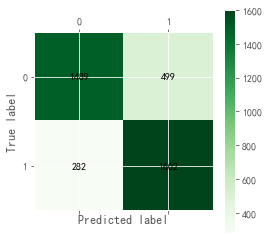

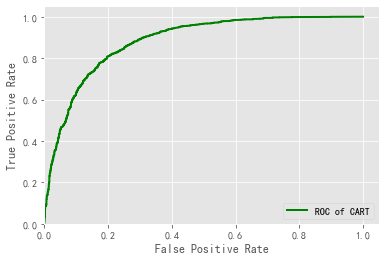

              precision    recall  f1-score   support

         0.0       0.84      0.75      0.79      1988
         1.0       0.76      0.85      0.80      1884

    accuracy                           0.80      3872
   macro avg       0.80      0.80      0.80      3872
weighted avg       0.80      0.80      0.80      3872

准确率 0.7982954545454546
召回率 0.8503184713375797
AUC值 0.8815878284569412

中低费用


C:\Users\yang\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


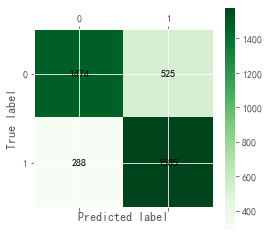

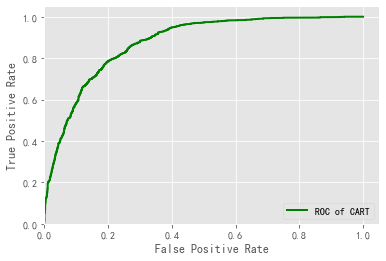

              precision    recall  f1-score   support

         0.0       0.84      0.74      0.78      1999
         1.0       0.75      0.85      0.80      1873

    accuracy                           0.79      3872
   macro avg       0.79      0.79      0.79      3872
weighted avg       0.80      0.79      0.79      3872

准确率 0.7900309917355371
召回率 0.8462359850507207
AUC值 0.8736494515276859

一般费用


C:\Users\yang\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


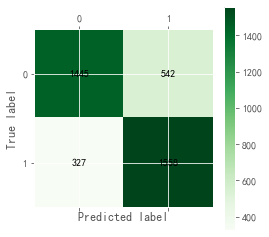

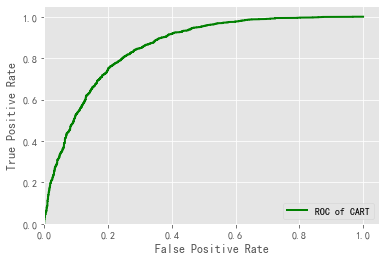

              precision    recall  f1-score   support

         0.0       0.82      0.73      0.77      1987
         1.0       0.74      0.83      0.78      1885

    accuracy                           0.78      3872
   macro avg       0.78      0.78      0.78      3872
weighted avg       0.78      0.78      0.78      3872

准确率 0.7755681818181818
召回率 0.826525198938992
AUC值 0.8529809811520241

中高费用


C:\Users\yang\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


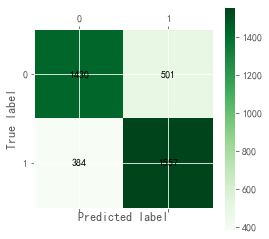

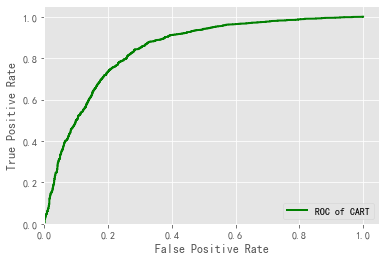

              precision    recall  f1-score   support

         0.0       0.79      0.74      0.76      1931
         1.0       0.76      0.80      0.78      1941

    accuracy                           0.77      3872
   macro avg       0.77      0.77      0.77      3872
weighted avg       0.77      0.77      0.77      3872

准确率 0.7714359504132231
召回率 0.8021638330757341
AUC值 0.8414304318141252

高费用


C:\Users\yang\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


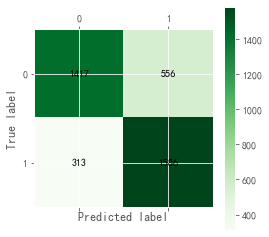

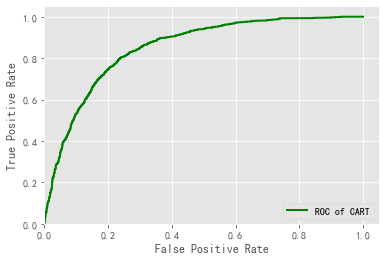

              precision    recall  f1-score   support

         0.0       0.82      0.72      0.77      1973
         1.0       0.74      0.84      0.78      1899

    accuracy                           0.78      3872
   macro avg       0.78      0.78      0.78      3872
weighted avg       0.78      0.78      0.77      3872

准确率 0.7755681818181818
召回率 0.8351764086361243
AUC值 0.8488659568738263

>>>>>>>>>>>>>>>>>>>>>>>>>>>> 朴素贝叶斯 <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
                        
低费用


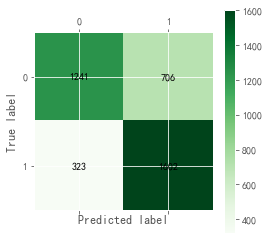

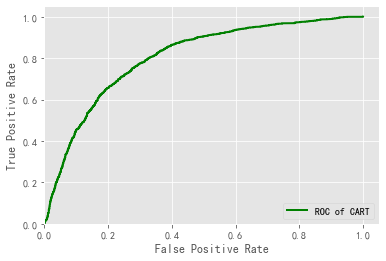

              precision    recall  f1-score   support

         0.0       0.79      0.64      0.71      1947
         1.0       0.69      0.83      0.76      1925

    accuracy                           0.73      3872
   macro avg       0.74      0.73      0.73      3872
weighted avg       0.74      0.73      0.73      3872

准确率 0.734245867768595
召回率 0.8322077922077922
AUC值 0.803183452397628

中低费用


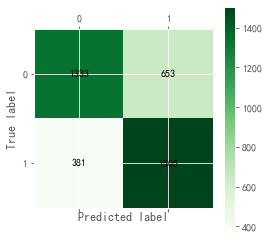

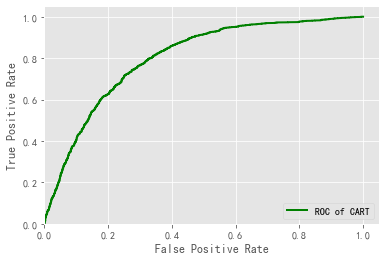

              precision    recall  f1-score   support

         0.0       0.78      0.67      0.72      1986
         1.0       0.70      0.80      0.74      1886

    accuracy                           0.73      3872
   macro avg       0.74      0.73      0.73      3872
weighted avg       0.74      0.73      0.73      3872

准确率 0.7329545454545454
召回率 0.7979851537645811
AUC值 0.800434697175029

一般费用


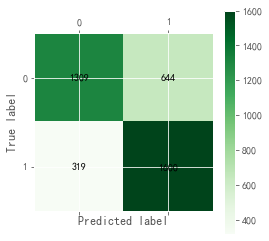

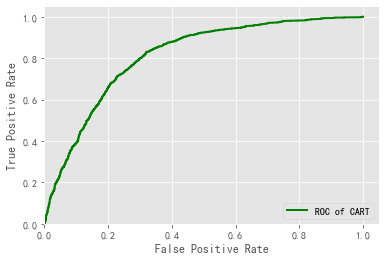

              precision    recall  f1-score   support

         0.0       0.80      0.67      0.73      1953
         1.0       0.71      0.83      0.77      1919

    accuracy                           0.75      3872
   macro avg       0.76      0.75      0.75      3872
weighted avg       0.76      0.75      0.75      3872

准确率 0.7512913223140496
召回率 0.8337675872850443
AUC值 0.8094933917354868

中高费用


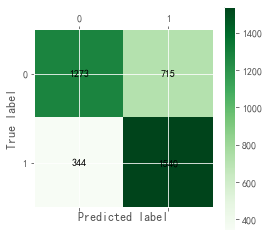

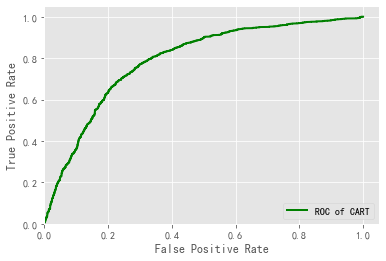

              precision    recall  f1-score   support

         0.0       0.79      0.64      0.71      1988
         1.0       0.68      0.82      0.74      1884

    accuracy                           0.73      3872
   macro avg       0.74      0.73      0.73      3872
weighted avg       0.74      0.73      0.72      3872

准确率 0.7264979338842975
召回率 0.8174097664543525
AUC值 0.789150374647033

高费用


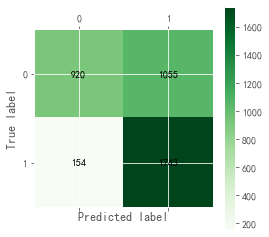

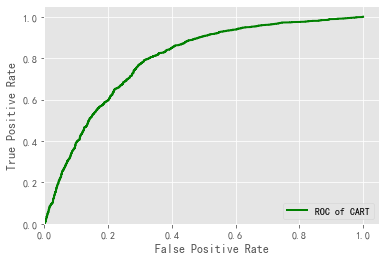

              precision    recall  f1-score   support

         0.0       0.86      0.47      0.60      1975
         1.0       0.62      0.92      0.74      1897

    accuracy                           0.69      3872
   macro avg       0.74      0.69      0.67      3872
weighted avg       0.74      0.69      0.67      3872

准确率 0.68775826446281
召回率 0.9188191881918819
AUC值 0.791362377638243

>>>>>>>>>>>>>>>>>>>>>>>>>>>> 支持向量机 <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
                        
低费用


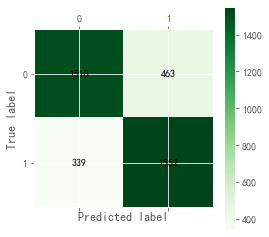

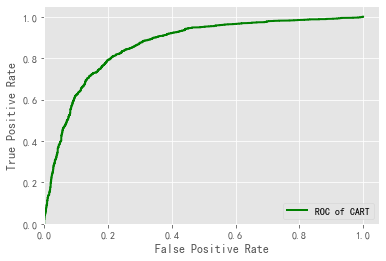

              precision    recall  f1-score   support

         0.0       0.82      0.77      0.79      1981
         1.0       0.77      0.82      0.79      1891

    accuracy                           0.79      3872
   macro avg       0.79      0.79      0.79      3872
weighted avg       0.79      0.79      0.79      3872

准确率 0.7928719008264463
召回率 0.8207297726070862
AUC值 0.8646819561081465

中低费用


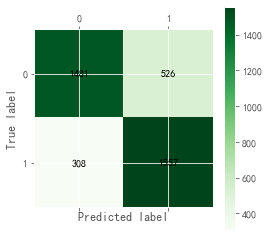

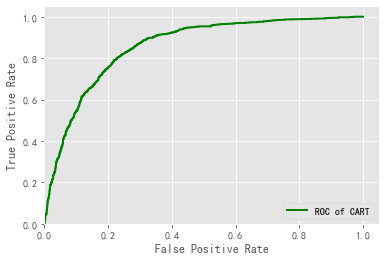

              precision    recall  f1-score   support

         0.0       0.83      0.74      0.78      2007
         1.0       0.75      0.83      0.79      1865

    accuracy                           0.78      3872
   macro avg       0.79      0.79      0.78      3872
weighted avg       0.79      0.78      0.78      3872

准确率 0.7846074380165289
召回率 0.83485254691689
AUC值 0.8564028580931886

一般费用


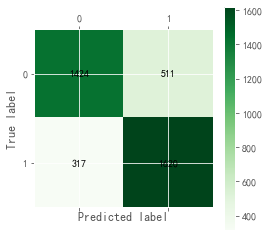

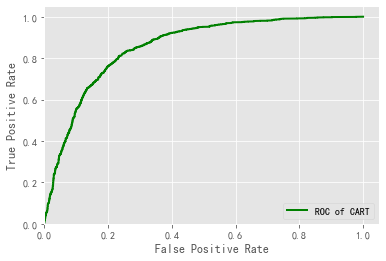

              precision    recall  f1-score   support

         0.0       0.82      0.74      0.77      1935
         1.0       0.76      0.84      0.80      1937

    accuracy                           0.79      3872
   macro avg       0.79      0.79      0.79      3872
weighted avg       0.79      0.79      0.79      3872

准确率 0.7861570247933884
召回率 0.8363448631905007
AUC值 0.8540712015036972

中高费用


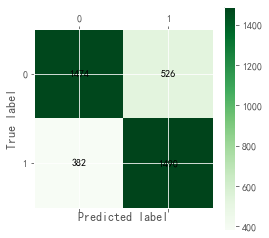

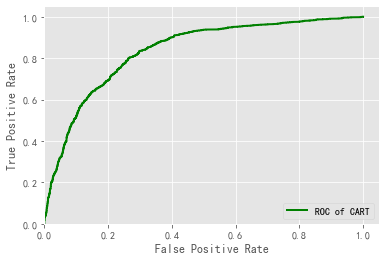

              precision    recall  f1-score   support

         0.0       0.79      0.74      0.76      2000
         1.0       0.74      0.80      0.77      1872

    accuracy                           0.77      3872
   macro avg       0.77      0.77      0.77      3872
weighted avg       0.77      0.77      0.77      3872

准确率 0.765495867768595
召回率 0.7959401709401709
AUC值 0.8339276175213675

高费用


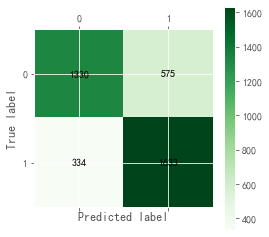

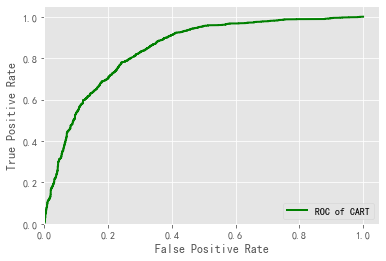

              precision    recall  f1-score   support

         0.0       0.80      0.70      0.75      1905
         1.0       0.74      0.83      0.78      1967

    accuracy                           0.77      3872
   macro avg       0.77      0.76      0.76      3872
weighted avg       0.77      0.77      0.76      3872

准确率 0.7652376033057852
召回率 0.8301982714794103
AUC值 0.8417286807120641

准确率
{'决策树低费用': 0.8277376033057852, '决策树中低费用': 0.8416838842975206, '决策树一般费用': 0.8341942148760331, '决策树中高费用': 0.8106921487603306, '决策树高费用': 0.828254132231405, '神经网络低费用': 0.7982954545454546, '神经网络中低费用': 0.7900309917355371, '神经网络一般费用': 0.7755681818181818, '神经网络中高费用': 0.7714359504132231, '神经网络高费用': 0.7755681818181818, '朴素贝叶斯低费用': 0.734245867768595, '朴素贝叶斯中低费用': 0.7329545454545454, '朴素贝叶斯一般费用': 0.7512913223140496, '朴素贝叶斯中高费用': 0.7264979338842975, '朴素贝叶斯高费用': 0.68775826446281, '支持向量机低费用': 0.7928719008264463, '支持向量机中低费用': 0.7846074380165289, '支持向量机一般费用': 0.7861570247933884, '支持向量机中高费用': 0.76549586776859

In [29]:
from sklearn.preprocessing import StandardScaler 
from sklearn.tree import DecisionTreeClassifier,export_graphviz
from sklearn.neural_network import MLPClassifier 
from sklearn.naive_bayes import GaussianNB 
from sklearn.svm import SVC 
from sklearn import metrics
import joblib
import numpy as np
import pandas as pd
from random import shuffle  #导入随机函数shuffle，用来打乱数据
import matplotlib.pyplot as plt
import graphviz
from sklearn.metrics import roc_curve,classification_report,confusion_matrix,accuracy_score,recall_score,auc

model = [DecisionTreeClassifier(),
         MLPClassifier(hidden_layer_sizes=(17,10),max_iter = 200,solver= 'lbfgs',random_state=50),
         GaussianNB(),
         SVC(probability=True)]
model_name = ['决策树','神经网络','朴素贝叶斯','支持向量机']
clss = ['低费用','中低费用','一般费用','中高费用','高费用']
准确率_anchor = {}
召回率_anchor = {}
AUC_anchor = {}
for k in range(len(model)):
    print('>>>>>>>>>>>>>>>>>>>>>>>>>>>>',model_name[k],'<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<')
    print('                        ')
    for i in range(len(clss)):
        print(clss[i])
        columns = res[clss[i]]+['IS_LOST']
        n_data = data[columns]
        positive_number = len(n_data[n_data['IS_LOST'] == 1])
        positive_indices = np.array(n_data[n_data['IS_LOST'] == 1].index)#.index是取出y=1对应的索引，并转化成np形式
        negative_indices = np.array(n_data[n_data['IS_LOST'] == 0].index)#.index是取出y=0对应的索引，并转化成np形式
        random_negative_indices = np.random.choice(negative_indices, positive_number, replace=False)#从negative_indices中选择出positive_number个数来，replace=false表没有重复替换的随机采样，也就是采出来的数据如果是一样的，不替换，也就是独立的。
        random_negative_indices = np.array(random_negative_indices)#选出来的数做成np格式
        under_sample_indices = np.concatenate([positive_indices, random_negative_indices])#把两个数组串联起来
        under_sample_data = n_data[n_data.index.isin(under_sample_indices)]
        under_sample_data = under_sample_data.values #将表格转换为矩阵 
        shuffle(under_sample_data)
        p = 0.8 #设置训练数据比例
        x_train = under_sample_data[:int(len(under_sample_data)*p),:][:,:-1] #前80%为训练集
        y_train = under_sample_data[:int(len(under_sample_data)*p),:][:,-1]
        x_test = under_sample_data[int(len(under_sample_data)*p):,:][:,:-1] #后20%为测试集
        y_test = under_sample_data[int(len(under_sample_data)*p):,:][:,-1]    
        stdScaler = StandardScaler().fit(x_train)
        x_train_std = stdScaler.transform(x_train)
        x_test_std = stdScaler.transform(x_test)
        clf = model[k]
        clf.fit(x_train_std,y_train) #训练
        pre = clf.predict(x_test_std)
        cm_plot(y_test,pre).show() #显示混淆矩阵可视化结果
        fpr, tpr, thresholds = roc_curve(y_test,clf.predict_proba(x_test_std)[:,1], pos_label=1)
        plt.plot(fpr, tpr, linewidth=2, label = 'ROC of CART', color = 'green') #作出ROC曲线
        plt.xlabel('False Positive Rate') #坐标轴标签
        plt.ylabel('True Positive Rate') #坐标轴标签
        plt.ylim(0,1.05) #边界范围
        plt.xlim(0,1.05) #边界范围
        plt.legend(loc=4) #图例
        plt.show() #显示作图结果
        pre == y_test    # 比较模型预测值与样本实际值是否一致
        print(classification_report(y_test, pre))
        print('准确率',accuracy_score(y_test, pre))
        准确率_anchor[model_name[k]+clss[i]] = accuracy_score(y_test, pre)
        print('召回率',recall_score(y_test, pre))
        召回率_anchor[model_name[k]+clss[i]] = recall_score(y_test, pre)
        print('AUC值',metrics.auc(fpr,tpr))
        AUC_anchor[model_name[k]+clss[i]] = metrics.auc(fpr,tpr)
        print('')
print('准确率')
print(准确率_anchor)
print("               ")
print('召回率')
print(召回率_anchor)
print("               ")
print('AUC')
print(AUC_anchor)
print("               ")

In [30]:
import pandas as pd

res = pd.concat([pd.Series(准确率_anchor), pd.Series(召回率_anchor), pd.Series(AUC_anchor)], axis=1)
res.columns = ['准确率', '召回率', 'AUC']
res['labels'] = res.index
res['labels'] = res['labels'].str.replace('决策树|神经网络|支持向量机|朴素贝叶斯', '')
res.sort_values(['labels', 'AUC'], ascending=False)

,准确率,召回率,AUC,labels
神经网络高费用,0.775568,0.835176,0.848866,高费用
支持向量机高费用,0.765238,0.830198,0.841729,高费用
决策树高费用,0.828254,0.830867,0.828312,高费用
朴素贝叶斯高费用,0.687758,0.918819,0.791362,高费用
神经网络低费用,0.798295,0.850318,0.881588,低费用
支持向量机低费用,0.792872,0.820730,0.864682,低费用
决策树低费用,0.827738,0.816466,0.827571,低费用
朴素贝叶斯低费用,0.734246,0.832208,0.803183,低费用
神经网络中高费用,0.771436,0.802164,0.841430,中高费用
支持向量机中高费用,0.765496,0.795940,0.833928,中高费用
